In [1]:
from fastai.basics import *
%matplotlib inline

In [2]:
path = Path("C:/Users/shahi/.fastai/data/mnist")

In [3]:
path

WindowsPath('C:/Users/shahi/.fastai/data/mnist')

In [4]:
with gzip.open(path/'mnist.pkl.gz','rb') as f:
    ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f,encoding="latin -1")


In [5]:
x_train.shape,y_train.max(),y_train.min(),x_valid.shape

((50000, 784), 9, 0, (10000, 784))

##### Visualize an image

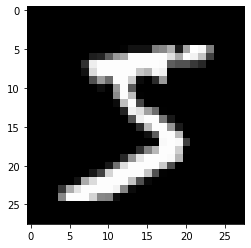

In [6]:
plt.imshow(x_train[0].reshape(28,28),cmap="gray")

In [7]:
x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))

In [8]:
x_train.shape,y_train.shape,y_train.max(),y_train.min()

(torch.Size([50000, 784]), torch.Size([50000]), tensor(9), tensor(0))

##### Create the datasets in toch,data loaders and daabunch

In [9]:
bs=64
train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_valid,y_valid)
data = DataBunch.create(train_ds,valid_ds,bs=64,num_workers=0)

In [10]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784,50,bias=True)
        self.lin2 = nn.Linear(50,10,bias=True)
        
    def forward(self,xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)
        

In [17]:
model = Mnist_NN().cuda()

In [11]:
model = Mnist_NN().cuda()
loss_func = nn.CrossEntropyLoss()
wd=1e-2
lr=2e-2

In [12]:
loss_func = nn.CrossEntropyLoss()

In [13]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [13]:
def update(x,y,lr):
    y_hat = model(x)
    w2=0
    for p in model.parameters(): w2+= (p**2).sum()
    loss = loss_func(y_hat,y) + wd*w2
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr*p.grad)
            p.grad.zero_()
    return loss.item()
        
    

In [14]:
losses = [update(x,y,lr) for x,y in data.train_dl]

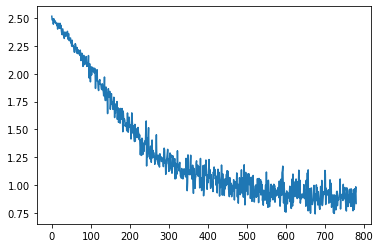

In [15]:
plt.plot(losses)

In [14]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(),lr)
    y_hat= model(x)
    loss = loss_func(y_hat,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [18]:
losses = [update(x,y,1e-3) for x,y in data.train_dl]

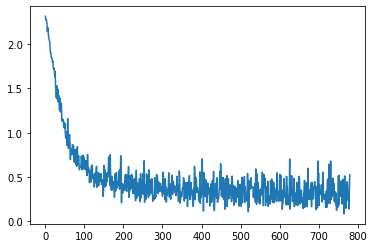

In [19]:
plt.plot(losses)